In [8]:
# load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('../../Data/processed/communities_and_crime.csv')
print(data.head())

   state        communityname  fold  householdsize  racepctblack  \
0      8         Lakewoodcity     1           0.33          0.02   
1     53          Tukwilacity     1           0.16          0.12   
2     24         Aberdeentown     1           0.42          0.49   
3     34  Willingborotownship     1           0.77          1.00   
4     42    Bethlehemtownship     1           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0          0.90          0.12         0.17         0.34         0.47  ...   
1          0.74          0.45         0.07         0.26         0.59  ...   
2          0.56          0.17         0.04         0.39         0.47  ...   
3          0.08          0.12         0.10         0.51         0.50  ...   
4          0.95          0.09         0.05         0.38         0.38  ...   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0              0.42            0.50           0.

In [9]:
data.shape

(1994, 104)

In [10]:
data = data.replace('?', np.nan)
data['OtherPerCap'] = data['OtherPerCap'].astype(float)
data['OtherPerCap'] = data['OtherPerCap'].fillna(data['OtherPerCap'].mean())

# Drop columns with more than 50% missing values
initial_shape = data.shape
data = data.dropna(thresh=len(data) * 0.5, axis=1)
print(f"Dropped {initial_shape[1] - data.shape[1]} columns with more than 50% missing values.")

Dropped 0 columns with more than 50% missing values.


In [11]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 104)


,state,communityname,fold,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,population,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.19,0.20
1,53,Tukwilacity,1,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.00,0.67
2,24,Aberdeentown,1,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.00,0.43
3,34,Willingborotownship,1,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.04,0.12
4,42,Bethlehemtownship,1,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.01,0.03


In [12]:

data.describe()

,state,fold,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,population,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.057593,0.237979
std,16.397553,2.873694,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.126906,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.010000,0.070000
50%,34.000000,5.000000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.020000,0.150000
75%,42.000000,8.000000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.050000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


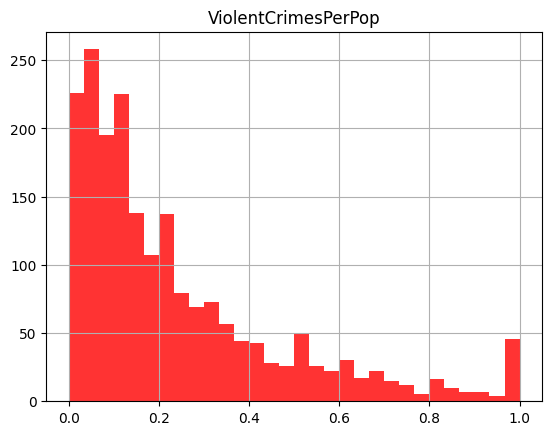

In [13]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

In [23]:
corrT = data.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
# corrT['ViolentCrimesPerPop']
list(corrT['ViolentCrimesPerPop'])

[-0.7384,
 -0.7067,
 -0.6848,
 -0.6661,
 -0.6616,
 -0.5763,
 -0.5255,
 -0.4707,
 -0.4391,
 -0.4242,
 -0.3574,
 -0.3521,
 -0.3391,
 -0.3316,
 -0.319,
 -0.3147,
 -0.3055,
 -0.2754,
 -0.2518,
 -0.2446,
 -0.2415,
 -0.2405,
 -0.2399,
 -0.2323,
 -0.2105,
 -0.2093,
 -0.1907,
 -0.1721,
 -0.1556,
 -0.1554,
 -0.1531,
 -0.1506,
 -0.1263,
 -0.1244,
 -0.11,
 -0.0984,
 -0.0909,
 -0.0772,
 -0.0715,
 -0.0449,
 -0.0397,
 -0.0349,
 -0.0326,
 -0.0225,
 -0.0195,
 0.0213,
 0.0376,
 0.0538,
 0.0605,
 0.0638,
 0.0672,
 0.0756,
 0.082,
 0.0993,
 0.118,
 0.1407,
 0.1534,
 0.1538,
 0.1719,
 0.1944,
 0.1968,
 0.216,
 0.2308,
 0.248,
 0.2481,
 0.2483,
 0.2532,
 0.2643,
 0.2814,
 0.2915,
 0.2931,
 0.2942,
 0.2948,
 0.2956,
 0.3,
 0.3046,
 0.325,
 0.3403,
 0.3486,
 0.3629,
 0.3645,
 0.3672,
 0.3758,
 0.3835,
 0.4111,
 0.4214,
 0.4476,
 0.4529,
 0.471,
 0.4745,
 0.4828,
 0.4834,
 0.4882,
 0.5042,
 0.5219,
 0.5254,
 0.5528,
 0.556,
 0.5747,
 0.6313,
 0.738,
 1.0]

In [19]:
data = data.drop(columns=['communityname'], axis=1)
data.head()

,fold,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,population,ViolentCrimesPerPop
0,1,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.19,0.20
1,1,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.00,0.67
2,1,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.00,0.43
3,1,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.04,0.12
4,1,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.01,0.03


REFERENCE: https://github.com/vbordalo/Communities-Crime/blob/master/Crime_v1.ipynb